In [92]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:

# Generates a list representing the input current voltage across total duration in milliseconds where the current begins and runs for the set duration
def Input_Current(total_duration, voltage_array, voltage_start_times, voltage_duration):
    current_input_array = np.zeros(total_duration)
    if not isinstance(voltage_array, list):
        voltage_array=[voltage_array]
    if not isinstance(voltage_start_times, list):
        voltage_start_times=[voltage_start_times]
    if len(voltage_array)!=len(voltage_start_times):
        raise Exception("Unequal lengths for voltage and start times")
    for i in range(len(voltage_array)):
        voltage=voltage_array[i]
        start_time=voltage_start_times[i]
        for j in range(voltage_duration):
            current_input_array[start_time+j]=voltage
    return current_input_array

# Checks to determine if the current voltage has surpassed the voltage threshold
def Spike_Occurred(current_voltage,voltage_threshold):
    if(current_voltage>voltage_threshold):
        return True
    else:
        return False

In [94]:
# The Neuron Class manages all the parameters and models that are used for testing.  
# The class requires the models are first initialized by giving the model parameters before running
# Then the proper model's membrane potential function can be called for a given input current
# The returned voltage and spiking behavior across the duration of the current will be returned

class Neuron:
    def __init__(self):
        self.LIF_initialilzed = False

    def Initialize_LIF(self,neuron_resting_voltage,neuron_firing_threshold,C_m, R_m):
        self.C_m = C_m
        self.R_m = R_m
        self.resting_voltage=neuron_resting_voltage
        self.voltage_threshold=neuron_firing_threshold
        self.LIF_initialized = True
        
    def LIF_Neuron_Voltage_Change(self,I, V_m):
        if self.LIF_initialized:
            voltage_change = ((I*self.R_m) - V_m)/(self.R_m*self.C_m)
            return voltage_change
        else:
            raise Exception('LIF was not initialized')
        
    def LIF_Membrane_Potential(self,input_current):
        membrane_potential_array = []
        spike_occurrence_array = []
    
        current_voltage = self.resting_voltage
    
        for t in range(len(input_current)):
            if Spike_Occurred(current_voltage,self.voltage_threshold):
                current_voltage = self.resting_voltage
                spike_occurrence_array.append(1)
            else:
                voltage_change = self.LIF_Neuron_Voltage_Change(input_current[t],current_voltage)
                current_voltage=current_voltage+voltage_change
                spike_occurrence_array.append(0)
            membrane_potential_array.append(current_voltage)
        
        return membrane_potential_array,spike_occurrence_array
        
    

In [95]:
# This class takes lists of input currents, membrane potentials, and spikes and plots them.

class Spike_Plotter:
    def __init__(self):
        pass
        
    def Plot_Spiking_Behavior(self,input_current,membrane_potential,spikes,title):
        fig,axes = plt.subplots(3,1,sharex=True)
        t = np.arange(len(input_current))
        self.Plot_Current(axes[0],t,input_current)
        self.Plot_Membrane_Potential(axes[1],t,membrane_potential)
        self.Plot_Spikes(axes[2],t,spikes)
        axes[0].set_title(title)
        plt.show()
    
    def Plot_Current(self,ax,t,input_current):
        ax.plot(t,input_current)
        ax.set_ylabel("I (mV)")
    
    def Plot_Membrane_Potential(self,ax,t,membrane_potential):
        ax.plot(t,membrane_potential)
        ax.set_ylabel("V (mV)")
    
    def Plot_Spikes(self,ax,t,spikes):
        ax.plot(t,spikes)
        ax.set_ylabel("Spikes")
        ax.set_xlabel("Time (ms)")




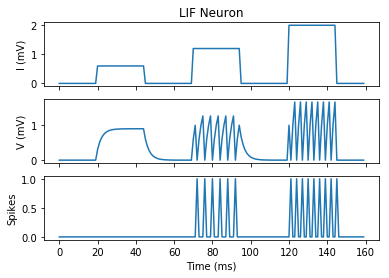

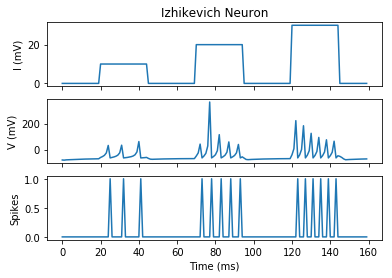

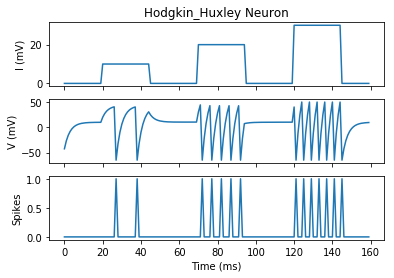

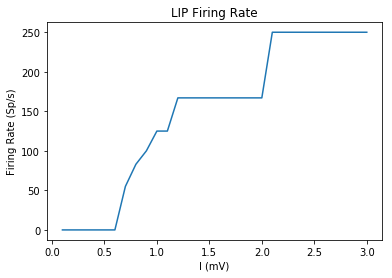

In [96]:
#LIP Parameters
neuron_resting_voltage=0
neuron_firing_threshold=1
C_m=2
R_m=1.5


# Input Current
total_duration=160
start_time=[20,70,120]
duration=25 # Duration of current

neuron=Neuron()
neuron.Initialize_LIF(neuron_resting_voltage,neuron_firing_threshold,C_m,R_m)
plotter = Spike_Plotter()

voltage=[0.6,1.2,2]

input_current=Input_Current(total_duration,voltage,start_time,duration)
membrane_potential,spike_occurrence = neuron.LIF_Membrane_Potential(input_current)
plotter.Plot_Spiking_Behavior(input_current,membrane_potential,spike_occurrence,"LIF Neuron")


